# Example for running MDF only

In [1]:
from equilibrator_api import ComponentContribution, Q_
from equilibrator_pathway import ThermodynamicModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

plt.style.use("seaborn-dark")

In [2]:
comp_contrib = ComponentContribution()

In [3]:
pp = ThermodynamicModel.from_sbtab("ecoli_noor_2016_mdf.tsv", comp_contrib=comp_contrib)
pp.update_standard_dgs()
pp.dg_confidence = 0.0  # 0.95

In [4]:
%%time
mdf_sol = pp.mdf_analysis()

CPU times: user 975 ms, sys: 1.26 s, total: 2.23 s
Wall time: 764 ms


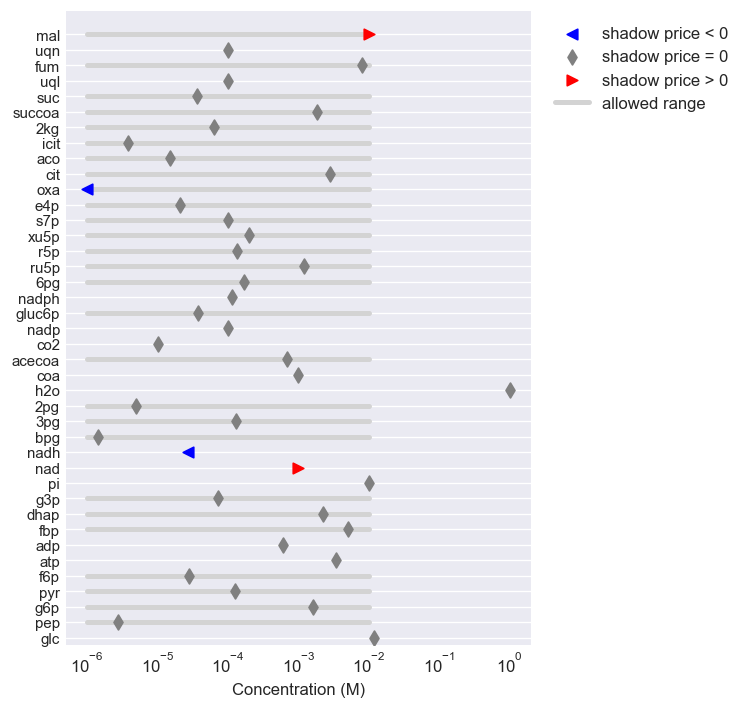

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 7), dpi=120)
mdf_sol.plot_concentrations(ax=ax)
ax.axes.yaxis.grid(True, which="major")

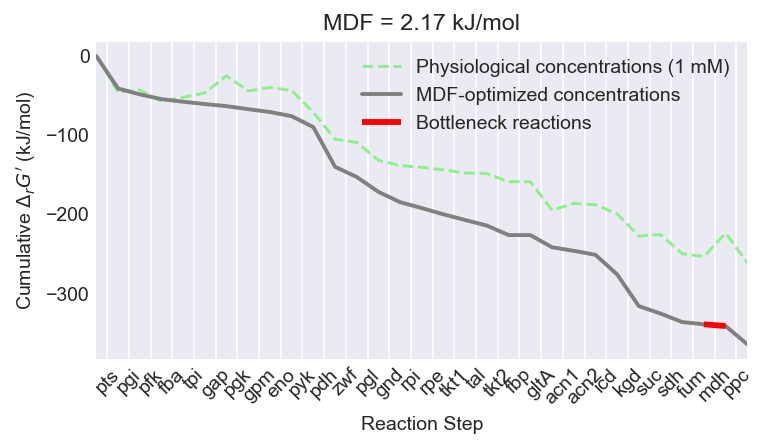

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=140)
mdf_sol.plot_driving_forces(ax=ax)
ax.axes.xaxis.grid(True, which="major")

In [7]:
mdf_sol.reaction_df

reaction_id                       reaction_formula  \
0          pts                  glc + pep = g6p + pyr   
1          pgi                              g6p = f6p   
2          pfk                  atp + f6p = adp + fbp   
3          fba                       fbp = dhap + g3p   
4          tpi                             dhap = g3p   
5          gap            g3p + nad + pi = bpg + nadh   
6          pgk                  adp + bpg = 3pg + atp   
7          gpm                              3pg = 2pg   
8          eno                        2pg = h2o + pep   
9          pyk                  adp + pep = atp + pyr   
10         pdh  coa + nad + pyr = acecoa + co2 + nadh   
11         zwf            g6p + nadp = gluc6p + nadph   
12         pgl                     gluc6p + h2o = 6pg   
13         gnd        6pg + nadp = co2 + nadph + ru5p   
14         rpi                             ru5p = r5p   
15         rpe                            ru5p = xu5p   
16        tkt1                 r5p + xu5p = g3p + s7p   
17         tal                  g3p + s7p = e4p + f6p   
18        tkt2                 e4p + xu5p = f6p + g3p   
19         fbp                   fbp + h2o = f6p + pi   
20        gltA         acecoa + h2o + oxa = cit + coa   
21        acn1                        cit = aco + h2o   
22        acn2                       aco + h2o = icit   
23         icd          icit + nad = 2kg + co2 + nadh   
24         kgd  2kg + coa + nad = co2 + nadh + succoa   
25         suc    adp + pi + succoa = atp + coa + suc   
26         sdh                  suc + uql = fum + uqn   
27         fum                        fum + h2o = mal   
28         mdh                 mal + nad = nadh + oxa   
29         ppc             oxa + pi = co2 + h2o + pep   

                               flux            original_standard_dg_prime  \
0        0.5691 millimolar / second   -45.48435837095876 kilojoule / mole   
1         0.385 millimolar / second    2.661700236513525 kilojoule / mole   
2        0.4417 millimolar / second  -14.598831217708607 kilojoule / mole   
3       0.44702 millimolar / second    22.39322425731214 kilojoule / mole   
4        0.4445 millimolar / second    5.575349871345196 kilojoule / mole   
5        0.9163 millimolar / second    4.602711492658557 kilojoule / mole   
6        0.8946 millimolar / second  -19.315639861920346 kilojoule / mole   
7        0.8729 millimolar / second     4.52040798250934 kilojoule / mole   
8       0.91875 millimolar / second  -3.8108873820313818 kilojoule / mole   
9        0.1841 millimolar / second   -27.58332335830653 kilojoule / mole   
10       0.3787 millimolar / second   -34.02434772279099 kilojoule / mole   
11       0.1813 millimolar / second   -3.923160145715201 kilojoule / mole   
12       0.1568 millimolar / second   -22.52326610960654 kilojoule / mole   
13       0.1323 millimolar / second   10.331992091052086 kilojoule / mole   
14  0.049933333 millimolar / second   -2.079713849932432 kilojoule / mole   
15  0.077233333 millimolar / second   -3.388013622025369 kilojoule / mole   
16       0.0448 millimolar / second  -3.8788530687725142 kilojoule / mole   
17       0.0448 millimolar / second  -0.8712610574916653 kilojoule / mole   
18       0.0273 millimolar / second  -10.192340143446188 kilojoule / mole   
19          0.0 millimolar / second                  0.0 kilojoule / mole   
20        0.154 millimolar / second  -35.917153193250755 kilojoule / mole   
21        0.154 millimolar / second     8.46762140128375 kilojoule / mole   
22        0.154 millimolar / second  -1.6243387204222017 kilojoule / mole   
23        0.154 millimolar / second   5.6065344886948765 kilojoule / mole   
24       0.0924 millimolar / second  -28.000676037568383 kilojoule / mole   
25       0.1673 millimolar / second   1.7513499411731743 kilojoule / mole   
26       0.0924 millimolar / second   -24.11224044506031 kilojoule / mole   
27       0.0924 millimolar / second  -3.4300285975664053 kilojoule / mole   
28

# Use Haverkorn dataset for validating ECM

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pandas as pd
from sbtab import SBtab

from equilibrator_api import ComponentContribution, Q_
from equilibrator_pathway.cost_function import EnzymeCostFunction
from equilibrator_pathway.ecm_model import EnzymeCostModel

In [9]:
model = EnzymeCostModel.from_sbtab("ecoli_noor_2016_ecm.tsv", comp_contrib=comp_contrib)
model.add_validation_data("ecoli_noor_2016_reference.tsv")

In [10]:
model.ecf.params["denominator"] = "CM"

In [11]:
%%time
print("Solving ECM problem")
ecm_sol = model.optimize_ecm()
res_sbtab = ecm_sol.to_sbtab()

Solving ECM problem
CPU times: user 224 ms, sys: 0 ns, total: 224 ms
Wall time: 230 ms


/home/eladn/git/equilibrator-pathway/venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1981: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


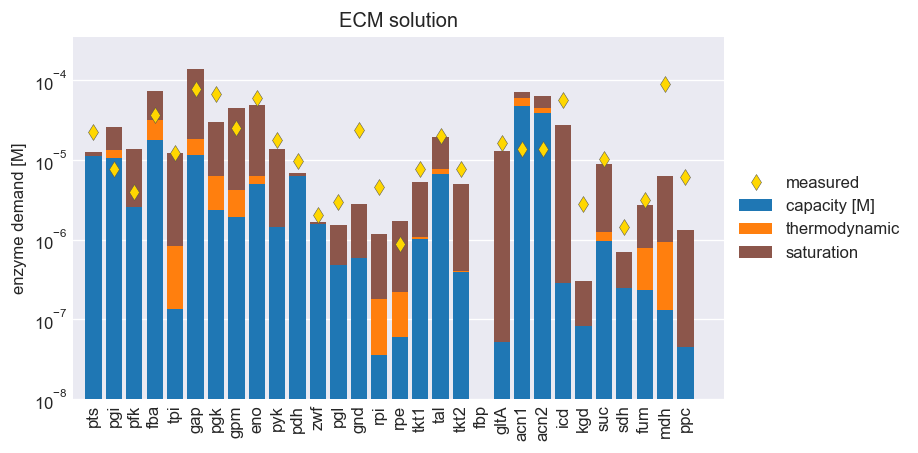

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=120)
ax.set_title("ECM solution")
ecm_sol.plot_enzyme_demand_breakdown(ax, plot_measured=True)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim(1e-8, None)
ax.set_xlim(-1, None)
ax.axes.yaxis.grid(True, which="major")

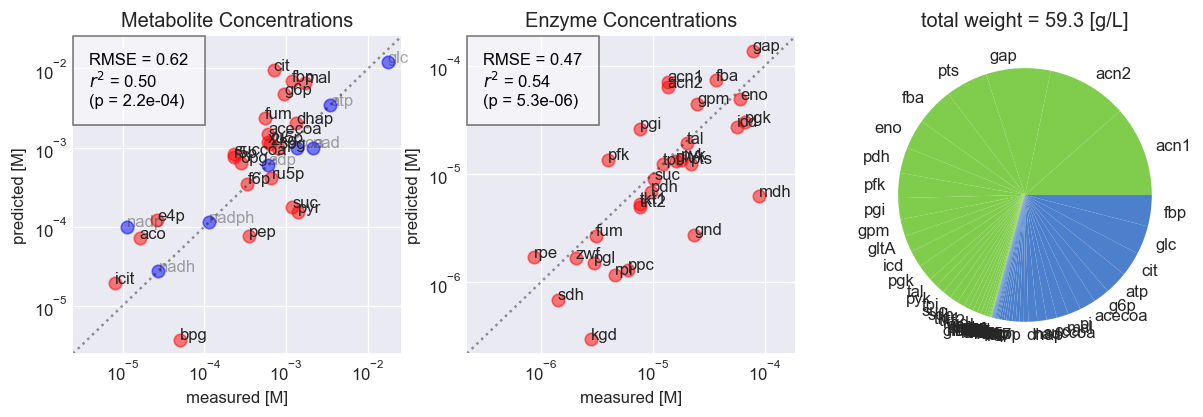

In [13]:
fig = plt.figure(figsize=(12, 3.5), dpi=120)
ax = fig.add_subplot(1, 3, 1, xscale="log", yscale="log")
ax.set_title("Metabolite Concentrations")
ecm_sol.validate_metabolite_conc(ax)

ax = fig.add_subplot(1, 3, 2, xscale="log", yscale="log")
ax.set_title("Enzyme Concentrations")
ecm_sol.validate_enzyme_conc(ax)

ax = fig.add_subplot(1, 3, 3)
ecm_sol.plot_volumes_pie(ax=ax)

In [14]:
ecm_sol.compound_df.head()

compound_id                 concentration       lower_bound      upper_bound
0         glc    0.012000000001064395 molar   12.0 millimolar  12.0 millimolar
1         pep    7.52062383386556e-05 molar  0.001 millimolar  10.0 millimolar
2         g6p   0.0047027625827586565 molar  0.001 millimolar  10.0 millimolar
3         pyr  0.00015266536828315586 molar  0.001 millimolar  10.0 millimolar
4         f6p   0.0003489641514492466 molar  0.001 millimolar  10.0 millimolar

In [15]:
ecm_sol.reaction_df.head()

reaction_id       reaction_formula                         flux  \
0         pts  glc + pep = g6p + pyr   0.5691 millimolar / second   
1         pgi              g6p = f6p    0.385 millimolar / second   
2         pfk  atp + f6p = adp + fbp   0.4417 millimolar / second   
3         fba       fbp = dhap + g3p  0.44702 millimolar / second   
4         tpi             dhap = g3p   0.4445 millimolar / second   

             original_standard_dg_prime                     standard_dg_prime  \
0   -45.48435837095876 kilojoule / mole   -45.48435837095876 kilojoule / mole   
1    2.661700236513525 kilojoule / mole    2.661700236513525 kilojoule / mole   
2  -14.598831217708607 kilojoule / mole  -14.598831217708607 kilojoule / mole   
3    22.39322425731214 kilojoule / mole    22.39322425731214 kilojoule / mole   
4    5.575349871345196 kilojoule / mole    5.575349871345196 kilojoule / mole   

                 physiological_dg_prime                     optimized_dg_prime  
0   -45.48435837095876 kilojoule / mole    -46.05109641383895 kilojoule / mole  
1    2.661700236513525 kilojoule / mole   -3.7824482163519058 kilojoule / mole  
2  -14.598831217708607 kilojoule / mole   -11.495050939270389 kilojoule / mole  
3    5.278386722591108 kilojoule / mole   -2.0664211504504877 kilojoule / mole  
4    5.575349871345196 kilojoule / mole  -0.43868881465082854 kilojoule / mole

In [16]:
ecm_sol.enzyme_df.head()

reaction_id      capacity  thermodynamic  saturation  allosteric  \
0         pts  1.114372e-05       1.000000    1.117605         1.0   
1         pgi  1.049101e-05       1.277570    1.950043         1.0   
2         pfk  2.560773e-06       1.009756    5.234374         1.0   
3         fba  1.779392e-05       1.767704    2.320342         1.0   
4         tpi  1.361792e-07       6.162547   14.710082         1.0   

                  concentration  
0  1.2454284213132912e-05 molar  
1   2.613642623719814e-05 molar  
2  1.3534820787299992e-05 molar  
3   7.298493422256026e-05 molar  
4   1.234485934462439e-05 molar

In [17]:
print(ecm_sol.to_sbtab().to_str())

!!!SBtab DocumentName='report' SBtabVersion='1.0' Date='2022-10-3'
!!SBtab TableID='Predicted concentrations' TableType='Quantity' TableName='Predicted concentrations' SBtabVersion='1.0' Unit='M'
!QuantityType	!Compound	!Value
concentration	glc	1.200e-02
concentration	pep	7.521e-05
concentration	g6p	4.703e-03
concentration	pyr	1.527e-04
concentration	f6p	3.490e-04
concentration	atp	3.449e-03
concentration	adp	6.046e-04
concentration	fbp	6.967e-03
concentration	dhap	2.018e-03
concentration	g3p	1.781e-04
concentration	pi	1.000e-02
concentration	nad	1.000e-03
concentration	nadh	2.742e-05
concentration	bpg	3.720e-06
concentration	3pg	9.779e-04
concentration	2pg	8.506e-05
concentration	h2o	1.000e+00
concentration	coa	1.000e-03
concentration	acecoa	1.495e-03
concentration	co2	1.000e-05
concentration	nadp	1.000e-04
concentration	gluc6p	1.431e-04
concentration	nadph	1.139e-04
concentration	6pg	6.398e-04
concentration	ru5p	4.122e-04
concentration	r5p	7.604e-04
concentration	xu5p	1.170e-03
conce